# Transactions data analysis
This notebook analyzes the provided Bank data to present the following:
* 3 Reports and Graphs of the data
* Fraud detection from the data

The snippet below installs the required dependencies.

In [101]:
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install openpyxl
!{sys.executable} -m pip install statsmodels
!{sys.executable} -m pip install scipy
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install seaborn

You should consider upgrading via the '/Users/eduardo.gutierrez/Envs/assignment3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/eduardo.gutierrez/Envs/assignment3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/eduardo.gutierrez/Envs/assignment3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/eduardo.gutierrez/Envs/assignment3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/eduardo.gutierrez/Envs/assignment3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/eduardo.gutierrez/Envs/assignment3/bin/python -m pip install --upgrade pip' command.
     |████████████████████████████████| 292 kB 3.2 MB/s            
You should consider upgrading via the '/Users/eduardo.gutierrez/Envs/assignment3/bin/python -m pip install --upgrade pip' command.


Pandas is imported to load and analyze the data.

In [13]:
import pandas as pd
import numpy as np
from scipy.stats import shapiro

Loading the transactions information from an excel file.

In [7]:
bank_data = pd.read_excel("CC-3Y-Transactions.xlsx")

The available columns can now be inspected by showing a sample of the first 15 rows.

In [9]:
bank_data.head(15)

,City,Date,Card Type,Exp Type,Gender,Amount
0,"Delhi, India",2014-10-29,Gold,Bills,F,82475
1,"Greater Mumbai, India",2014-08-22,Platinum,Bills,F,32555
2,"Bengaluru, India",2014-08-27,Silver,Bills,F,101738
3,"Greater Mumbai, India",2014-04-12,Signature,Bills,F,123424
4,"Bengaluru, India",2015-05-05,Gold,Bills,F,171574
5,"Delhi, India",2014-09-08,Silver,Bills,F,100036
6,"Delhi, India",2015-02-24,Gold,Bills,F,143250
7,"Greater Mumbai, India",2014-06-26,Platinum,Bills,F,150980
8,"Delhi, India",2014-03-28,Silver,Bills,F,192247
9,"Delhi, India",2014-09-01,Platinum,Bills,F,67932


Let's review the structure and information of the dataset.

In [11]:
print(bank_data.shape)
bank_data.info()

(26052, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26052 entries, 0 to 26051
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   City       26052 non-null  object        
 1   Date       26052 non-null  datetime64[ns]
 2   Card Type  26052 non-null  object        
 3   Exp Type   26052 non-null  object        
 4   Gender     26052 non-null  object        
 5   Amount     26052 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 1.2+ MB


From the information above, it's noticeable that there are not null entries in the records for each column, since the number of non-null entries for each one is equal to the total amount shown by `RangeIndex`, 26,052.

## Report 1: Normality of expenses amounts
The `Amount`of each of the recorded transactions is inspected for normality. Which is done by getting common exploratory metrics of the data, `median`, `mean` and a Shapiro-Wilk test. This will allow us to determine if the data has a certain pattern for further analysis of fraud.

In [15]:
bank_data['Amount'].agg([np.mean, np.median]).round(2)

mean      156411.54
median    153106.50
Name: Amount, dtype: float64

In [21]:
shapiro(bank_data['Amount'])

ShapiroResult(statistic=0.8734562397003174, pvalue=0.0)

From the output of the Shapiro-Wilk test, given that the p-value is < 0.05, we don't have sufficient evidence to consider the amount as normally distributed. We can plot the QQ norm plot to check it visually as well.

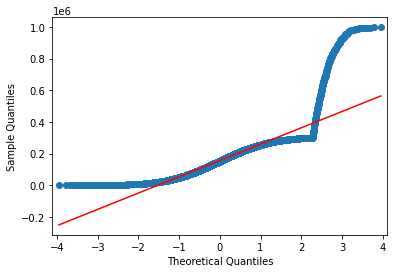

In [23]:
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

qqplot(bank_data['Amount'], line='s')
pyplot.show()

As we cans see from the above graph, the data for amount does not follow a normal distribution. Finally, let's graph the histogram of the `Amount` variable to see how it's distributed.

array([[<AxesSubplot:title={'center':'Amount'}>]], dtype=object)

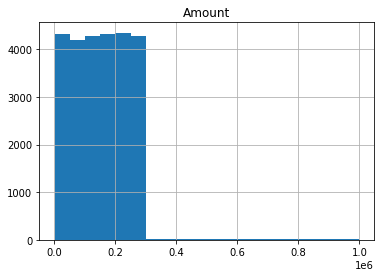

In [35]:
bank_data.hist(column="Amount", bins=20)

From the histogram above, the data is skewed to the right, meaning there are several outliers past amounts of 30,000. We can alternatively plot the histogram using Seaborn.

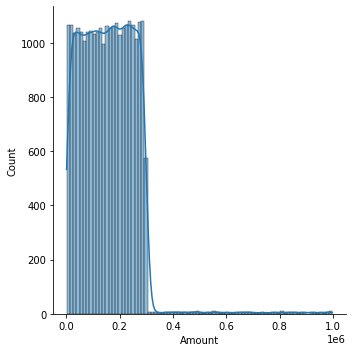

In [102]:
import seaborn as sns
sns.displot(bank_data["Amount"], bins=82, kde=True);

We can appreciate a bit more detail, but it's still evident that near 0.3*1e6, the outliers start to appear and most of the population remains below this amount.

## Report 2: Expenses by City
In this section exploration is carried based on the available cities.

In [52]:
!{sys.executable} -m pip install geopy
!{sys.executable} -m pip install folium

You should consider upgrading via the '/Users/eduardo.gutierrez/Envs/assignment3/bin/python -m pip install --upgrade pip' command.
     |████████████████████████████████| 95 kB 1.6 MB/s            
  Using cached requests-2.27.1-py2.py3-none-any.whl (63 kB)
  Using cached Jinja2-3.1.1-py3-none-any.whl (132 kB)
  Using cached MarkupSafe-2.1.1-cp38-cp38-macosx_10_9_x86_64.whl (13 kB)
  Using cached urllib3-1.26.9-py2.py3-none-any.whl (138 kB)
  Using cached idna-3.3-py3-none-any.whl (61 kB)
  Using cached certifi-2021.10.8-py2.py3-none-any.whl (149 kB)
  Using cached charset_normalizer-2.0.12-py3-none-any.whl (39 kB)
You should consider upgrading via the '/Users/eduardo.gutierrez/Envs/assignment3/bin/python -m pip install --upgrade pip' command.


In [67]:
amounts_by_city = bank_data.groupby('City').agg({'Amount': 'sum'})
# The line below is only needed to capture the data for further processing of the locations
# amounts_by_city.to_csv("unique_cities.csv", header=False)

There are 986 unique cities, out of the 26,052 available records, that's a almost a 1:26 ratio.
We can then group amounts per city. The code below retrieves the location for each city, but since it takes too long to run, it produces a timeout against the python Kernel in the notebook. We just use a cached version of the data.

> ⚠️ Only uncomment and run the code below if you have properly configured the timeout for your Jupyter notebook, otherwise, run it in a separate file.

In [86]:
# import csv

# locations = []

# with open("unique_cities.csv", "r") as f:
#     unique_cities = csv.reader(f)

#     geolocator = Nominatim(user_agent="ConestogaApp")

#     for row in unique_cities:
#         city = row[0]
#         amount = row[1]
#         print(f"Getting location for {city}")
#         location = geolocator.geocode(city)
#         locations.append((city, amount, location.latitude, location.longitude))

# with open("cities_with_location.csv", "w") as f:
#     writer = csv.writer(f)
#     writer.writerow(('City', 'Amount', 'Latitude', 'Longitude'))
#     for loc in locations:
#         writer.writerow(loc)
am_loc = pd.read_csv("cities_with_location.csv")
am_loc.head(5)
am_loc.info()

,City,Amount,Latitude,Longitude
0,"Achalpur, India",1606641,21.241445,77.425757
1,"Adilabad, India",1769464,19.500000,78.500000
2,"Adityapur, India",963993,22.792542,86.085518
3,"Adoni, India",1575355,15.655919,77.269774
4,"Adoor, India",647725,9.158186,76.773261


Some of the locations could not be obtained, those will be replaced by the median of the location.

In [88]:
am_loc["Latitude"] = am_loc["Latitude"].fillna(am_loc["Latitude"].mean())
am_loc["Longitude"] = am_loc["Longitude"].fillna(am_loc["Longitude"].mean())

am_loc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   City       986 non-null    object 
 1   Amount     986 non-null    int64  
 2   Latitude   986 non-null    float64
 3   Longitude  986 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 30.9+ KB


Below is a map with the cities with the highest amounts of transactions grouped by city.

In [100]:
import folium

m = folium.Map(location=[am_loc.Latitude.mean(),am_loc.Longitude.mean()], zoom_start=5, tiles='Stamen Toner')
max_amount = am_loc.Amount.max()

for _, row in am_loc.iterrows():
    radius = row.Amount/max_amount

    if radius <= 1 and radius >= 0.3:
        color = '#C70039'
    elif radius < 0.3 and radius >= 0.15:
        color = '#FFC300'
    else:
        color = '#1787FE'

    folium.CircleMarker(
        location=[row.Latitude,row.Longitude],radius=radius*50, popup = f"{row.City} ({row.Amount})",color=color,fill=True,fill_color=color)\
        .add_to(m)

m

## Report 3: Pre-analysis for Fraud detection
This section focuses on understanding the rest of the columns of the dataset to try to identify a way of categorizing possible transaction frauds. It starts with looking at unique values per columns.

### Expense Type Analysis
A short analysis for the expenses types is performed to identify which unique values there are and how the observations are distributed across them.

In [106]:

bank_data["Exp Type"].unique()

array(['Bills', 'Food', 'Entertainment', 'Grocery', 'Fuel', 'Travel'],
      dtype=object)

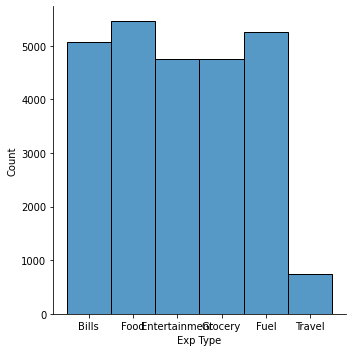

In [146]:
sns.displot(bank_data["Exp Type"])

### Card type analysis
A short analysis for the different Card types is performed to identify which unique values there are and how the observations are distributed across them.

In [121]:
bank_data["Card Type"].unique()

array(['Gold', 'Platinum', 'Silver', 'Signature'], dtype=object)

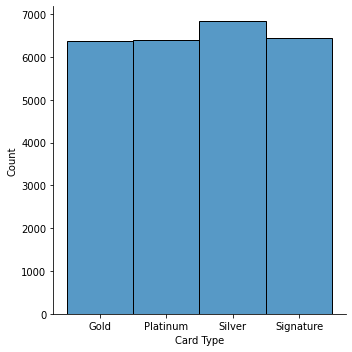

In [122]:
sns.displot(bank_data["Card Type"])

### Gender analysis
A short analysis for the Genders is performed to identify which unique values there are and how the observations are distributed across them.

In [123]:
bank_data["Gender"].unique()

array(['F', 'M'], dtype=object)

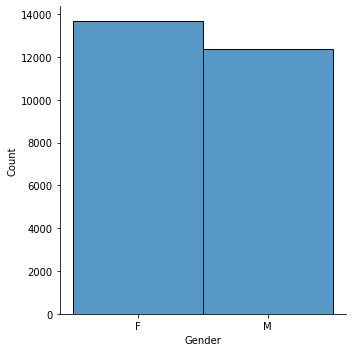

In [124]:
sns.displot(bank_data["Gender"])

### Dates analysis
A short analysis for the different dates is performed to identify which unique values there are and how the observations are distributed across them.

In [110]:
bank_data['Short date'] = pd.to_datetime(bank_data["Date"]).dt.strftime('%Y-%m')

In [117]:
sorted(bank_data['Short date'].unique())

['2013-10',
 '2013-11',
 '2013-12',
 '2014-01',
 '2014-02',
 '2014-03',
 '2014-04',
 '2014-05',
 '2014-06',
 '2014-07',
 '2014-08',
 '2014-09',
 '2014-10',
 '2014-11',
 '2014-12',
 '2015-01',
 '2015-02',
 '2015-03',
 '2015-04',
 '2015-05']

<AxesSubplot:xlabel='Short date'>

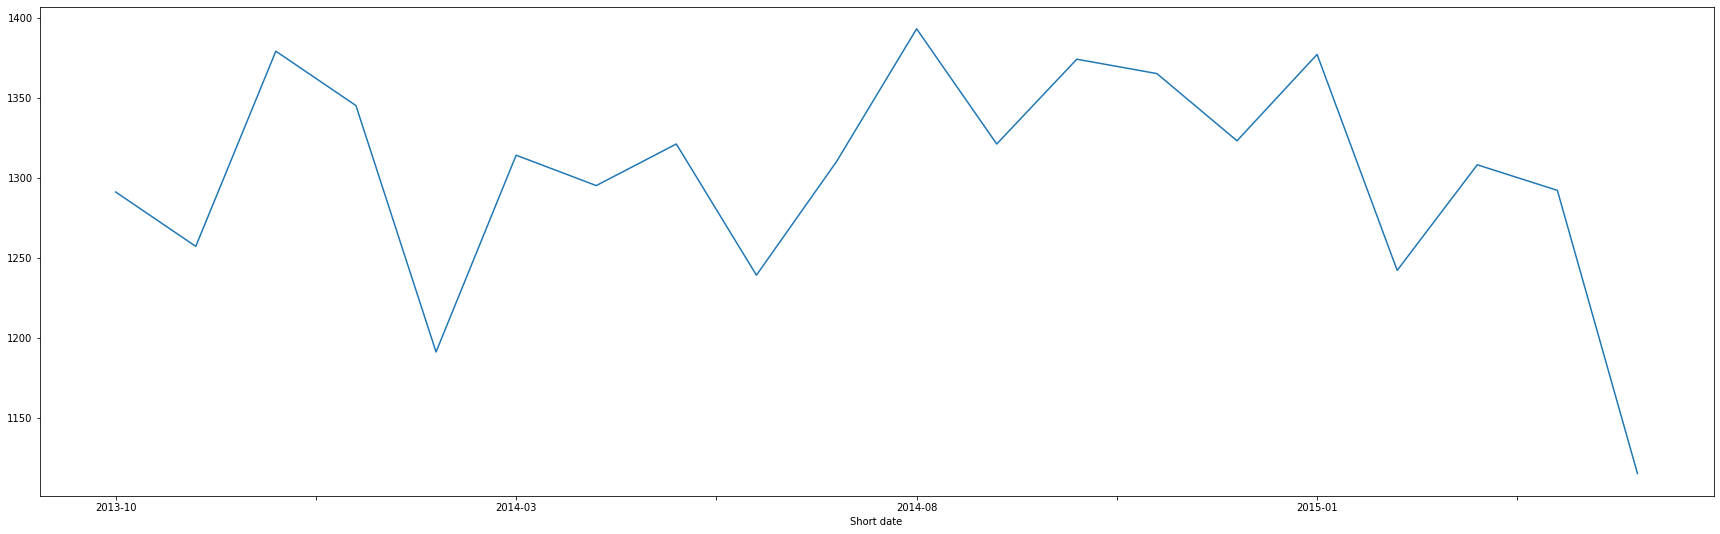

In [143]:
pyplot.figure(figsize=(30,9))
bank_data.value_counts('Short date', sort=False).plot()

In [145]:
bank_data.corr()

,Amount
Amount,1.0


## Fraud detection Report
This section focuses on detecting possible fraud transactions for the data provided.

## References
* [Simple Scatter Plots](https://jakevdp.github.io/PythonDataScienceHandbook/04.02-simple-scatter-plots.html)
* 